# Correlation and complications, part II

In the previous notebook, we talked about some of the assumptions or requirements for (Pearson) correlation.  To review, we assume that:

1. The variables we are analyzing are continuous (vs. discrete, categorical, or ordinal) -- they can take on any value in a range of numbers
2. The relationship between the variables is expected to be linear (vs. nonlinear, for which we'll need a different test)
3. The variables come from a normal distribution
4. The are no outliers in the dataset

In the real world, our data may violate some (or all!) of these assumptions.  In some cases this indicates that the Pearson correlation is not the appropriate test (see below for dealing with non-linear and non-continuous variables).  In other cases we may need to account for these violations either through modifying (penalizing) our effect size or taking a different approach to calculating significance.  

We have to add another assumption as well (and this particularly affects our judgement and calculation of significance) about the independence of the values in our datasets:

1. The variables are random and independent 

This may be violated in a number of ways in real data, but one of the ones we are most concerned about will be issues of spatial and temporal autocorrelation -- that some of our data are dependent on others.  In the next class we'll explore the consequences of this and some of the ways to deal with this.  We also need to be mindful of how sample size (and more generally degrees of freedom) affect significance testing. If you look at the calculation of the t statistic above, you see the degrees of freedom are in the numerator, and so very large samples sizes can give significant results for relatively small effect sizes (small values of _r_).  Evaluating whether a significant p-value with a small effect size is 'meaningful', even if 'significant' is important.  This and other drawbacks of p-values has led to a large number of papers questioning their use and value (e.g. [see here](https://www.tandfonline.com/doi/full/10.1080/00031305.2019.1583913)) over the last several years.  We also have to be aware of the statistical consequences of multiple comparisons (running many correlation analyses). 

Let's explore some of these challenges and some of the possible solutions.  We'll talk about other non-parametric approaches next week.


## Non-independence

When the values in our dataset are not independent of one another, this can bias our estimate of the significance of any correlation ($p$) and also potentially be misleading about the effect size ($r$).  Let's create some random Gaussian series of numbers and see how various forms of non-independence can affect them.

First, let's get some libraries imported and see how we can create random numbers:

In [1]:
import numpy as np # import Numpy as np
import pandas as pd # import Pandas as pd
import scipy as sp # Import Scipy as sp
import matplotlib.pyplot as plt # get the plotting functionality from Matplotlib

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
# plt.rcParams['font.family'] = 'Helvetica'


Numpy (amongst other libraries, of course) has extensive capacity for (pseudo) random number creation.  You can see more about that here, [Random sampling in Numpy](https://numpy.org/doc/stable/reference/random/index.html).  For the moment, we'll just create random normal data -- data drawn from a normal distribution with a given mean and variance.  Keep in mind that we will all be creating different sets of random numbers, so you won't get the exact answer as your classmates or the instructor, and if you run through the notebook multiple times you will get somewhat different numbers each time.

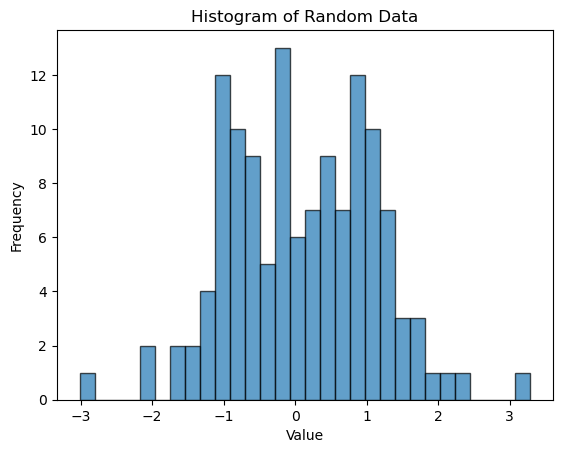

In [2]:
mean = 0
std_dev = 1

# the line of code below creates a random draw of 128 numbers from a normal distribution with mean of zero and standard deviation or 1 
x = np.random.normal(mean, std_dev, 128)

# Plot a histogram of the generated data
plt.hist(x, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()


As you can see, with a relatively small number of random draws, the distribution looks roughly normal, but we would need a lot more draws to really look completely like the normal distribution itself. 

Let's create another random time series:

In [3]:
y = np.random.normal(mean, std_dev, 128)

Let's make a scatterplot of our two variables - we would expect them to appear as a cloud of points with little relationship between the pairs of datapoints:

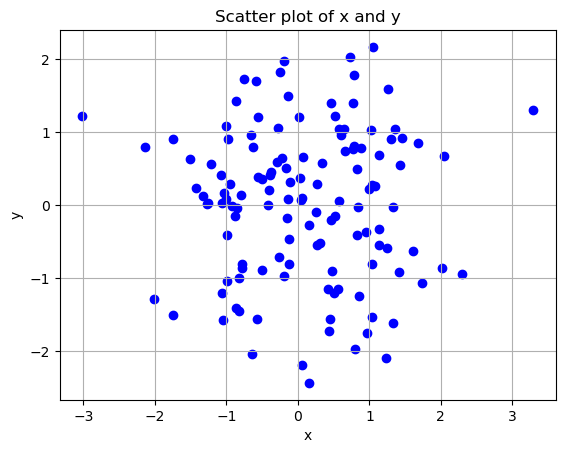

In [4]:
# Create a scatter plot
plt.scatter(x, y, color='blue', marker='o')

# Add title and labels
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.grid(True)
plt.show()

And then let's calculate the correlation between them.  Again, based on how we created the variables and the lack of relationship we see in the scatter plot, we might expect that given two random draws from a normal distribution that there should be no significant correlation between these two series

In [5]:
random_correlation = sp.stats.pearsonr(x,y) 
print(np.round(random_correlation,2))

[-0.01  0.95]


The output from Scipy's Pearson correlation function indeed shows $r=0.01$ and a p-value of 0.9.  In otherwords, a very weak relationship where we cannot reject the null hypothesis.  We would call this relationship 'not significant', are more precisely meaning that there is a 90\% chance of observing $r=0.01$ or larger for the null hypothesis of no significant relationship.

## Trend effects on correlation

OK, let's see how adding something as simple as a trend can affect that correlation value.  First, we'll generate a simple trend line with a given slope, add it to our random normal variables, and re-calculate the correlation:

In [13]:
# Define the slope
slope = 0.05

# Generate t values (0 to 127 in this case)
t = np.arange(128)

# Generate y values using that slope (y = slope * t) to give a line
linear = slope * t

x_lin = x + linear
y_lin = y + linear

trend_correlation = sp.stats.pearsonr(x_lin,y_lin) 
trend_correlation

PearsonRResult(statistic=0.7773434406646316, pvalue=3.9329358637672275e-27)

Whoa, what happened - we added a very gentle upward sloping line to both random (and uncorrelation) series, and now we have a substantially correlation ($r=0.79) and a highly significant p value.  Let's take a look at our series and think about what has happened:

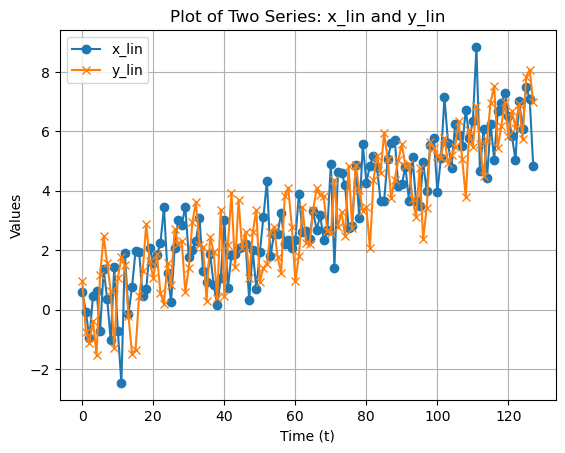

In [14]:
# Plot the two series
plt.plot(t, x_lin, label='x_lin', linestyle='-', marker='o')
plt.plot(t, y_lin, label='y_lin', linestyle='-', marker='x')

# Add title and labels
plt.title('Plot of Two Series: x_lin and y_lin')
plt.xlabel('Time (t)')
plt.ylabel('Values')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

Interesting!  So even with a relatively shallow trend line added to the random, the correlation becomes large and highly significant.  In class now, let's talk about why that is.  If you'd like, play around with different values of `slope` above to see how the steepness of the trend line might affect the magnitude of the correlation and the significance level. 

Let's make a scatterplot to see how that has affected the structure of the data relationship:

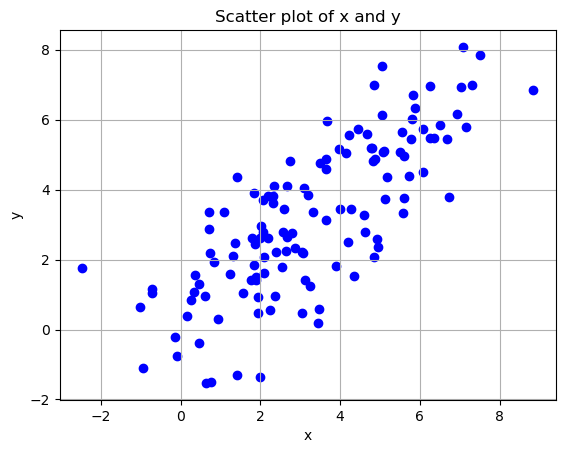

In [15]:
# Create a scatter plot
plt.scatter(x_lin, y_lin, color='blue', marker='o')

# Add title and labels
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.grid(True)
plt.show()

Wow - the presence of a trend has created a structure that means that positive values of x+trend are now paired with positive values of y+trend. What about if the lines have different underlying trends?  That is, imagine a case where there are two different processes controlling long-term trends in our data series, each with a different magnitude

In [16]:
# Generate y values using that slope (y = slope * t) to give a line
linear_1 = 0.01 * t
linear_2 = 0.05 * t

x_lin1 = x + linear_1
y_lin1 = y + linear_2

trend_correlation = sp.stats.pearsonr(x_lin1,y_lin1) 
trend_correlation # most likely still significant, although lower correlation r value

PearsonRResult(statistic=0.35000820771426255, pvalue=5.123674189962378e-05)

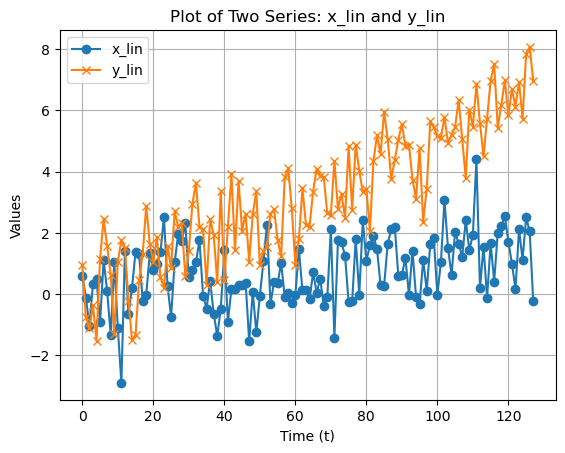

In [17]:
# Plot the two series
plt.plot(t, x_lin1, label='x_lin', linestyle='-', marker='o')
plt.plot(t, y_lin1, label='y_lin', linestyle='-', marker='x')

# Add title and labels
plt.title('Plot of Two Series: x_lin and y_lin')
plt.xlabel('Time (t)')
plt.ylabel('Values')

# Show legend
plt.legend()

# Show grid
plt.grid(True)

# Display the plot
plt.show()

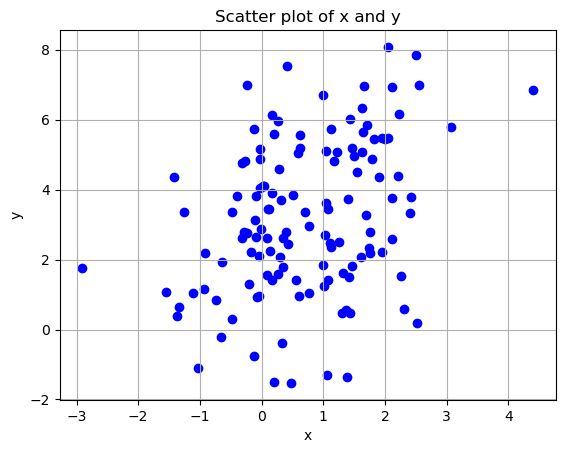

In [18]:
# Create a scatter plot
plt.scatter(x_lin1, y_lin1, color='blue', marker='o')

# Add title and labels
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.grid(True)
plt.show()

Again, our random series are correlated (although more weakly, and with less obvious structure) even with trends of different magnitudes.  

Note that $r$ here in both cases is still _correct_ -- the relationship being described mathematically is essentially that when one of our series+trend is positive, the other tends to be positive, and when one is negative, the other tends to be negative.  So the $r$ is correctly calculated but the inference we draw from that statistic could be biased by the presense of the trend.  Our p value will be misleading as well. Remember that we get the t-statistic from the $r$ and the degrees of freedom ($n$) -- _but_ the degrees of freedom are only equivalent to the sample size when the values in our two datasets are independent and randomly draw from the same distribution.  In the case of a linear trend, that independence breaks down (more 'recent' values in our data series are more likely to be positive than 'earlier' values).  We'll need to think about how to potentially correct our $p$ value for the non-independence of the values in our dataset. 

Take a moment and chat with your classmates - what is one way we might deal with this problem?  We'll put our answer below:

#### Try to do a regression to find the trend, then remove it. 

In [20]:
from scipy.signal import detrend

x_detrended=detrend(x_lin1)
y_detrended=detrend(y_lin1)

trend_correlation=sp.stats.pearsonr(x_detrended,y_detrended)
trend_correlation

PearsonRResult(statistic=-0.010540820662138017, pvalue=0.9059970017841036)

## Cyclical behavior

Cyclical behavior can impart a similar structure to otherwise random data.  For instance, let's say you were interested in the peak of summer warmth in a strongly cyclical series like the annual cycle of temperature.  Similar cyclical patterns like the annual cycle can affect the independence of your data series and once again potentially lead to weakly supported inferences.  Let's see how this works:

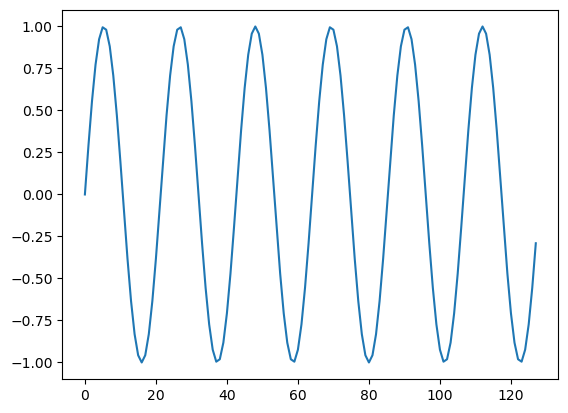

In [21]:
cyclesPerTime = 6 # how many cycles would we like to create per our 128 time steps? 
cycle = np.sin(2 * np.pi * (cyclesPerTime / 128) * t) # create a sine wave with that many cycles

plt.plot(t,cycle) # let's take a look
plt.show()

Let's add the cycle to our random series from before and see how this affects our correlation values:

In [22]:
x_cycle = x + cycle
y_cycle = y + cycle

cycle_correlation = sp.stats.pearsonr(x_cycle,y_cycle) 
cycle_correlation # most likely still significant, although lower correlation r value

PearsonRResult(statistic=0.3270985075318107, pvalue=0.0001641614411187364)

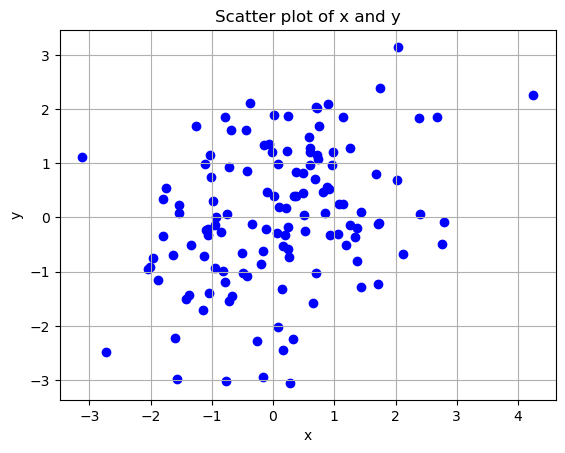

In [23]:
# Create a scatter plot
plt.scatter(x_cycle, y_cycle, color='blue', marker='o')

# Add title and labels
plt.title('Scatter plot of x and y')
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.grid(True)
plt.show()

Here, the presence of a regular cycle of positive and negative values has imparted an underlying relationship to the random variability of $x$ and $y$.  The solution here could be a bit more complicated than above with the linear trend, but you could imagine one simple approach would be calculating and removing a mean annual cycle from the data before doing any calculations on the underlying variability.  

## Autocorrelation and independence 

Even when the underlying structure is not something as clear or dominant as a trend or cycle, if our data points are not truly independent, this can bias our assessment of significance toward being too liberal (e.g. a Type 1 error).  Non-independence (especially if we think about it in _time_) manifests as auto-correlation (correlation with yourself) - that is, that consecutive values are not simply random draws from a distribution but rather are influenced in part by values that came before.  We can write a simple 1st order autocorrelation relationship as: 

$
X_{t} = \alpha_{1} X_{t-1} + Z_{t}
$

Or, for every given value $x$, that value is in part determined by the value that preceded it.  Now, let's think again about the equation for the t-statistic:

$
t = r \sqrt{\frac{n-2}{1-r^2}}
$

The $n$ is not simply the sample size, but rather accounts for how many degrees of freedom we have.  In situations where the values in our datasets are not independent, we have _fewer_ degrees of freedom than we have samples, and not accounting for this means that our $n$ is too large and therefore our $p$ will over-estimate the probability of rejecting the null hypothesis. 

Let's write a function to do a very simple calculation of the self- (auto) correlation in a time series.  We'll do that simply by creating a copy of the series and sliding (or lagging) it relative to itself, and calculating the correlation: 

In [24]:
def lagged_autocorrelation(series, lag=1): # default is lag of 1 - note, lag of zero will give an error here - how would you improve this function to avoid that? 
    # Calculate the Pearson correlation coefficient between the series and its lagged version (lag=1 is my default)
    return  sp.stats.pearsonr(series[:-lag], series[lag:])[0] # returns correlation only with [0]

# now, call the function we wrote and apply to the combination of random x and the sine wave cycle
lagged_autocorrelation(x_cycle)

0.3523421437748199

This suggests that at lag 1, the time series `x_cycle` is relatively similar to itself - there is information shared between any given value in the series and value that precedes it, meaning the series does _not_ consist of completely independent values and the degrees of freedom are not as large as the sample size.

We can calculate and plot the correlation at various lags - in the first few lines below, I demonstrate a [list comprehension](https://realpython.com/list-comprehension-python/) -- essentially, a replacement for a loop.  Then we'll use Matplotlib to plot the correlation as a function of the lag:

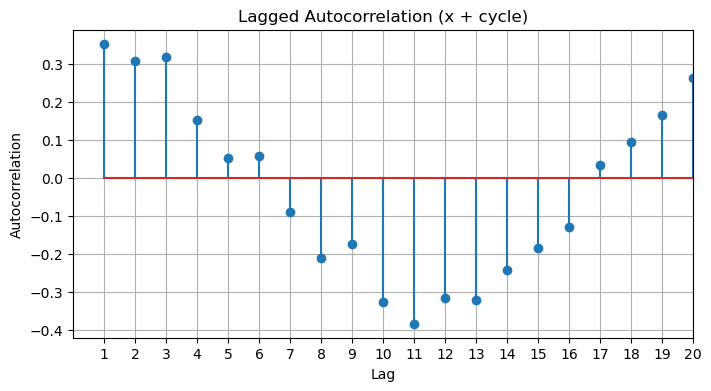

In [26]:
lags = range(1, 21)
autocorrelations = [lagged_autocorrelation(x_cycle, lag) for lag in lags] # this is a list comprehension, see here: https://realpython.com/list-comprehension-python/

# note that the alternative to the list comprehension above is the following loop - it works as well but is longer! 
# lags = range(1, 21)
# autocorrelations = []  # Initialize an empty list to store results
# for lag in lags:
#    autocorr = lagged_autocorrelation(x_cycle, lag)  # Calculate the autocorrelation for the current lag
#    autocorrelations.append(autocorr)  # Append the result to the growing list

# Plot the autocorrelation values
plt.figure(figsize=(8, 4))
plt.stem(lags, autocorrelations)
plt.xticks(lags)  # Set x-ticks to show only the lags from 1 to 20
plt.xlim(0, 20)  # Limit x-axis to the range 1 to 20
plt.title('Lagged Autocorrelation (x + cycle)')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.show()

Let's create some autocorrelated series now using the equation:

$
X_{t} = \alpha_{1} X_{t-1} + Z_{t}
$

In this case we won't have the severity or structure that imparting a cycle had in the example above, but we are still going to reduce the independence and therefore the degrees of freedom in our series:

In [27]:
# Set a 'random' seed to a specific number -- my age -- for reproducibility so we all get the same thing
np.random.seed(48)

# Parameters for the autoregressive equation we'll write
n = 128  # once again, length of the time series
alpha1 = 0.8  # an autocorrelation coefficient (0 < alpha < 1)
alpha2 = 0.8  # another autocorrelation coefficient (0 < alpha < 1)

# Generate the first time series with autocorrelation
xa = np.zeros(n)
xa[0] = np.random.normal()  # Initialize the first value from the random normal
for t in range(1, n): # loop over the length of the series, determining the next value from the combination of the autocorrelation and another random number
    xa[t] = alpha1 * xa[t-1] + np.random.normal()

# Generate the second time series with autocorrelation like above
ya = np.zeros(n)
ya[0] = np.random.normal() 
for t in range(1, n):
    ya[t] = alpha2 * ya[t-1] + np.random.normal()

We now have two time series, $xa$ and $ya$ that have a degree of autocorrelation - let's see what that actually looks like:

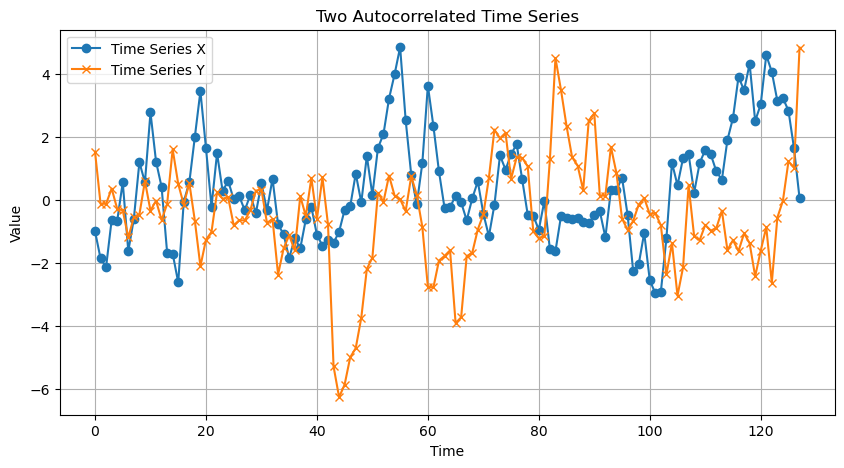

In [28]:
# Plot the two time series
plt.figure(figsize=(10, 5))

plt.plot(xa, label='Time Series X', linestyle='-', marker='o')
plt.plot(ya, label='Time Series Y', linestyle='-', marker='x')

plt.title('Two Autocorrelated Time Series')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

Remember that we built these series from an initial random value and at each time step we selected another random value with some added information from the draw before.  But technically these two time series should have very little in common with each other. Let's see:

In [29]:
autocorrelation_correlation = sp.stats.pearsonr(xa,ya) 
autocorrelation_correlation

PearsonRResult(statistic=-0.10461481784522375, pvalue=0.23991523807070658)

Indeed that's the case, although there is still some small association (but $p>0.05$).  If we generated enough different time series, we might find that eventually we get 'lucky' and find a set that are correlated.  But for our purposes in the next section, all we need is to keep our eye on that p-value.

Thus far we've been using Scipy for our correlation and significance value, but now we're going to need to do something different - we're going to have to account for the loss of degrees of freedom that comes from have time series that are not independent.  Below, we're going to roll our own code to do correlation and significance testing, with the added ability to specify the degrees of freedom and penalize it for autocorrelation:

## Rolling your own correlation for reduced degrees of freedom

The function below will take two time series and the degrees of freedom.  If you thought there was no meaningful autocorrelation, you might make the effective sample size $N_{eff}$ the same as the actual sample size.  But as we'll see, we can pass this function a penalized 'effective' sample size to account for autocorrelation.  

In [20]:
def my_correlation_function(x,y,neff):
    dof = neff - 2
    correlation_matrix = np.corrcoef(x, y)
    correlation_value = correlation_matrix[0, 1]
    t_statistic = (correlation_value * np.sqrt(dof)) / np.sqrt(1 - correlation_value**2)
    p_value = 2 * (1 - sp.stats.t.cdf(abs(t_statistic), df=dof)) 
    return correlation_value, p_value

Let's make sure we get the same answer as Scipy:

In [ ]:
my_correlation_function(xa,ya,np.size(x))

We're going to use a calculation of the effective samples size $N_{eff}$ from [Thiebaux and Zwiers 1984](https://journals.ametsoc.org/view/journals/apme/23/5/1520-0450_1984_023_0800_tiaeoe_2_0_co_2.xml), although it has also been described and articulated elsewhere.  The effective sample size is the sample size times the ratio of 1 less the product of the 1st order autocorrelation over 1 plus the product of the 1st order autocorrelations.  The effect here will be that the larger the autocorrelation, the smaller the numerator and the larger the denominator, and therefore the greater penalty:

$
N_{\rm eff} = N \frac{(1-\rho_1\rho_2)}{(1+\rho_1\rho_2)}
$

In [ ]:
rho1 = lagged_autocorrelation(xa)
rho2 = lagged_autocorrelation(ya)
N = np.size(xa)

Neff = round(N * (1 - rho1 * rho2) / (1 + rho1 * rho2))
N, Neff


Let's now see how using this much reduced effective sample size changes the p-value:

In [ ]:
my_correlation_function(xa,ya,Neff)